# Implementation of CNN using tensorflow 2.x on the CIFAR-10 datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.1.0


---

### Working with CIFAR-10 dataset

In [4]:
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 541s 3us/step


In [5]:
# Now, this data is already in 4 dimension and C value is 3 which specifies teh color part of the data
# And, hence this data is of colored pictures 

x_train.shape

(50000, 32, 32, 3)

In [6]:
# Targerts are two dimensional arrays instead of 1

y_train.shape

(50000, 1)

---

#### Target data needs to be flatten

In [7]:
x_train, x_test = x_train / 255.0 , x_test / 255.0 

In [8]:
y_train, y_test = y_train.flatten(), y_test.flatten()

In [9]:
# After flattening of the target, the data has become 1 dimensional

y_train.shape

(50000,)

In [10]:
y_test.shape

(10000,)

In [11]:
# Importing the importing functions which will be used in CNN

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout

In [12]:
# Getting the number of classes 

k_classes = len(set(y_train))            # There has to be 10 classes

In [14]:
print("Total number of classes are:-",k_classes)

Total number of classes are:- 10


---

# Bulding the Model using the functional API on CIFAR-10 data as we did for fashion_mnist dataset.

In [15]:
# Giving the shape of Input on the basis of first data of input data.

i = Input(shape = x_train[0].shape)

In [16]:
# Conv2D is used beacause data iss 2D in real like Height and Weight,   there is Conv1D and Conv3D as well

# 1st parameter used is feature map, second is the filter size, then strides and then activation function
# This whole calculation is applied on i type data

# Because of 3 channels in data, the filter size is 3 x 3 x 3 x 32   where 32 is the number of feature maps
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)

In [17]:
# As we did functional programming in spark and pig, the resultant of this previous layer will be used
# in the next layer as in functional programming concepts.

x = Conv2D(64, (3,3), strides=2, activation='relu')(x)

In [18]:
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

In [19]:
# To convert the image into the feature vector

x = Flatten()(x)

In [20]:
# Dropout is for regularization

x = Dropout(0.5)(x)

In [21]:
# Applying the Dense layer
x = Dense(1024, activation = 'relu',)(x)

In [22]:
x = Dropout(0.2)(x)

In [23]:
x = Dense(k_classes, activation = 'softmax')(x)

In [25]:
from tensorflow.keras.models import Model

In [31]:
# passing inside the model constructor

# First parameter can be considered as input and second is considered as output
cnn_model_2 = Model(i, x)

---

# Compiling the Model

In [32]:
cnn_model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

---

# Fitting the model with the data or say training the model

In [33]:
my_result_2 = cnn_model_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 21s 423us/sample - loss: 1.5758 - accuracy: 0.4221 - val_loss: 1.3049 - val_accuracy: 0.5334
Epoch 2/20
50000/50000 [==============================] - 19s 385us/sample - loss: 1.2821 - accuracy: 0.5391 - val_loss: 1.1291 - val_accuracy: 0.5989
Epoch 3/20
50000/50000 [==============================] - 19s 382us/sample - loss: 1.1531 - accuracy: 0.5870 - val_loss: 1.0531 - val_accuracy: 0.6247
Epoch 4/20
50000/50000 [==============================] - 21s 413us/sample - loss: 1.0618 - accuracy: 0.6201 - val_loss: 1.0104 - val_accuracy: 0.6407
Epoch 5/20
50000/50000 [==============================] - 20s 404us/sample - loss: 0.9921 - accuracy: 0.6448 - val_loss: 0.9599 - val_accuracy: 0.6638
Epoch 6/20
50000/50000 [==============================] - 21s 419us/sample - loss: 0.9356 - accuracy: 0.6664 - val_loss: 0.9117 - val_accuracy: 0.6838
Epoch 7/20
50000/50000 [====================

---

## Plotting the loss per iteration and it should decrease

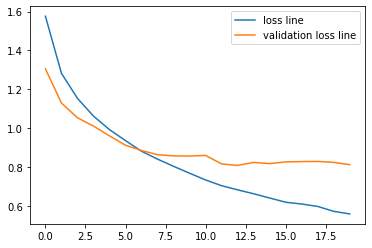

In [34]:
plt.plot(my_result_2.history['loss'],label = 'loss line')
plt.plot(my_result_2.history['val_loss'],label = 'validation loss line')

plt.legend()

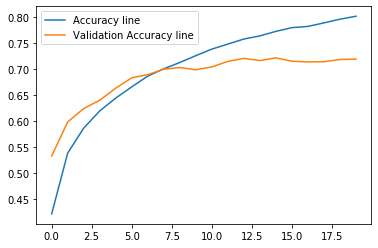

In [36]:
### Plotting the accuracy per Iteration

plt.plot(my_result_2.history['accuracy'], label = 'Accuracy line')
plt.plot(my_result_2.history['val_accuracy'], label = 'Validation Accuracy line')

plt.legend()

---

### Plotting the confusion matrix


In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
import itertools

In [39]:
def plot_confusion_matrix(cm, classes, normalize = False,
                         title = 'Confusion Matrix',
                         cmap = plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix. 
    Normalization can be applied by setting 'normalize=True'.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
        
    else:
        print("Confusion Matrix, without Normalization")
        
    print(cm)
    
    
    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment='center',
                color="white" if cm[i, j] > thresh else 'black')
    
    
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
    plt.show()
    


Confusion Matrix, without Normalization
[[744  22  28  26  24  12   8  13  83  40]
 [ 18 811   6  13   3   4  13   2  27 103]
 [ 62   3 579  85 100  50  57  39  17   8]
 [ 22   4  60 567  66 143  72  46   8  12]
 [ 18   1  45  85 678  35  36  89   9   4]
 [ 14   1  30 227  51 577  30  59   6   5]
 [  5   4  30  81  44  23 793   9   6   5]
 [ 17   1  28  49  66  42   2 778   5  12]
 [ 47  23   7  18   3  13   4   5 848  32]
 [ 16  59   6  20   3   7  11  25  30 823]]


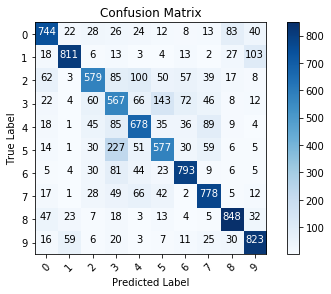

In [40]:
p_test = cnn_model_2.predict(x_test).argmax(axis =1) 
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [55]:
my_labels = '''
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

In [56]:
print(my_labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


---

### Checking some miss classification

In [51]:
misclassified_idx = np.where(p_test!=y_test)[0]

In [52]:
misclassified_idx

array([   6,    9,   10, ..., 9989, 9995, 9998], dtype=int64)

In [53]:
len(misclassified_idx)

2802

In [54]:
# randomly selecting one data from all those misclassified data

i = np.random.choice(misclassified_idx)

Text(0.5, 1.0, 'True Label: cat Predicted dog')

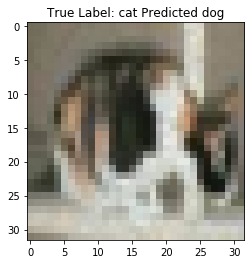

In [48]:
plt.imshow(x_test[i],cmap = 'gray')

plt.title("True Label: %s Predicted %s" %(my_labels[y_test[i]], my_labels[p_test[i]]))